## Lifecycle analysis

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("../csv_outputs/master_lifecycle.csv")

# contracts.head()

df.columns

df.info()

# contracts.describe()

# contracts.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   token_address                    2123 non-null   object 
 1   chain                            2123 non-null   object 
 2   token_name                       2123 non-null   object 
 3   token_age_seconds                2123 non-null   float64
 4   token_creation_date              2092 non-null   object 
 5   creation_to_first_trade_seconds  2092 non-null   float64
 6   creation_to_first_trade_blocks   2092 non-null   float64
 7   last_tx_hash                     2123 non-null   object 
 8   last_active_age                  2123 non-null   object 
 9   inactive_days                    2123 non-null   float64
dtypes: float64(4), object(6)
memory usage: 166.0+ KB


### Token age (days) - Time since first transaction

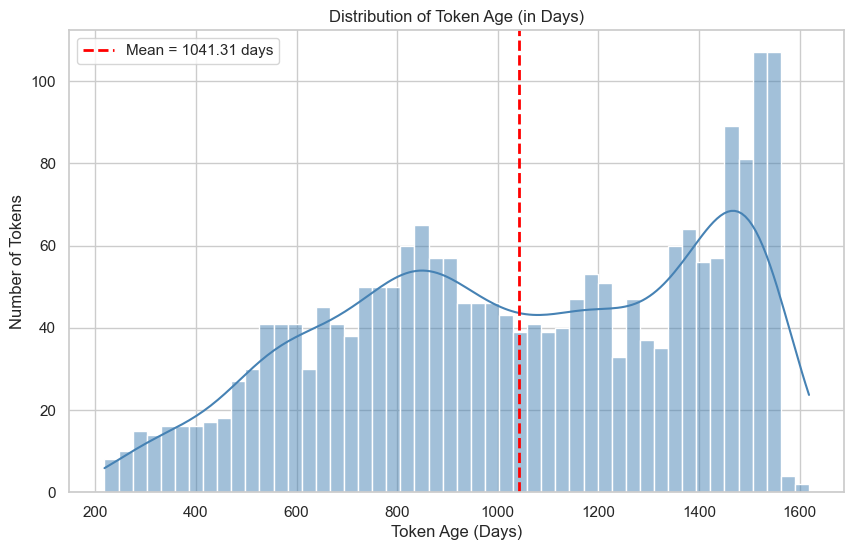

In [44]:
sns.set_theme(style='whitegrid')

# Convert token age to days
df['token_age_days'] = df['token_age_seconds'] / (60 * 60 * 24)

# Calculate mean
mean_age = df['token_age_days'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['token_age_days'], bins=50, kde=True, color='steelblue')

# Add vertical mean line
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_age:.2f} days')

# Labels and legend
plt.title('Distribution of Token Age (in Days)')
plt.xlabel('Token Age (Days)')
plt.ylabel('Number of Tokens')
plt.legend()
plt.grid(True)
plt.show()

### Creation to first trade delay: Time (seconds) and Blocks

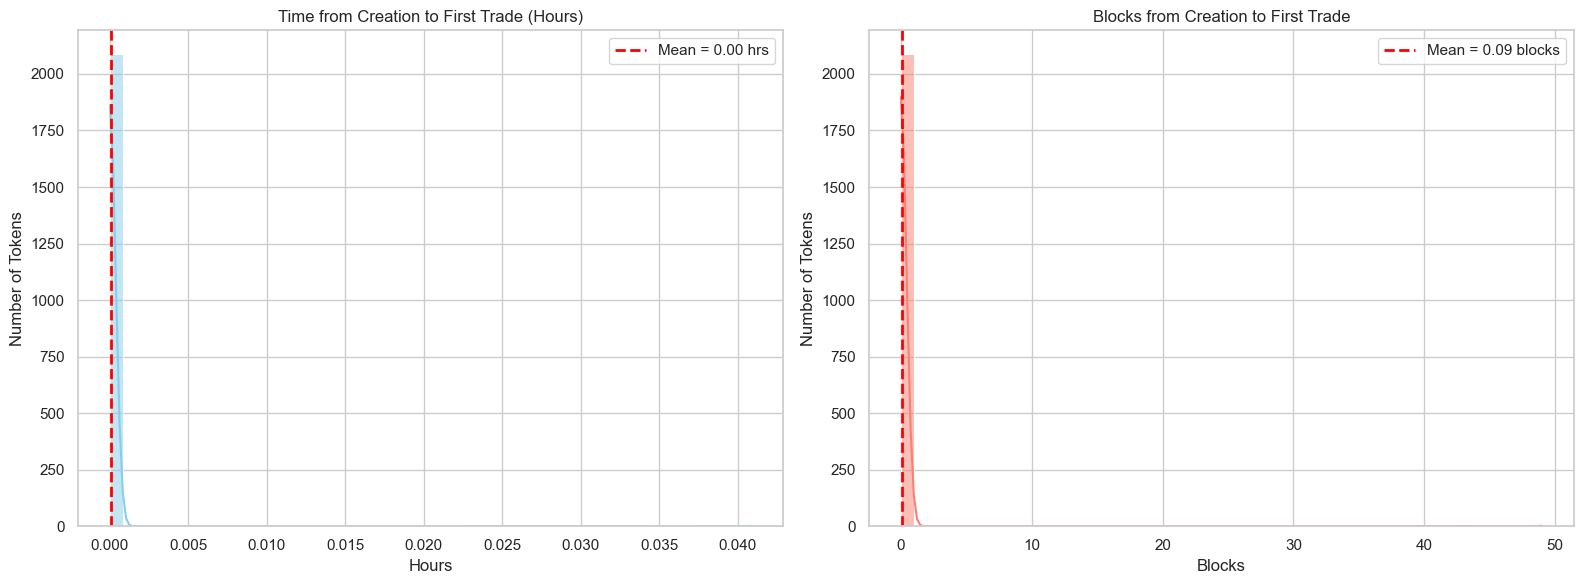

In [43]:
# Convert seconds to hours for better interpretability (if not already done)
df['first_trade_hours'] = df['creation_to_first_trade_seconds'] / 3600

# Compute means
mean_hours = df['first_trade_hours'].mean()
mean_blocks = df['creation_to_first_trade_blocks'].mean()

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Time to first trade in hours
sns.histplot(df['first_trade_hours'], bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].axvline(mean_hours, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_hours:.2f} hrs')
axes[0].set_title('Time from Creation to First Trade (Hours)')
axes[0].set_xlabel('Hours')
axes[0].set_ylabel('Number of Tokens')
axes[0].grid(True)
axes[0].legend()

# Plot 2: Blocks to first trade
sns.histplot(df['creation_to_first_trade_blocks'], bins=50, kde=True, ax=axes[1], color='salmon')
axes[1].axvline(mean_blocks, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_blocks:.2f} blocks')
axes[1].set_title('Blocks from Creation to First Trade')
axes[1].set_xlabel('Blocks')
axes[1].set_ylabel('Number of Tokens')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

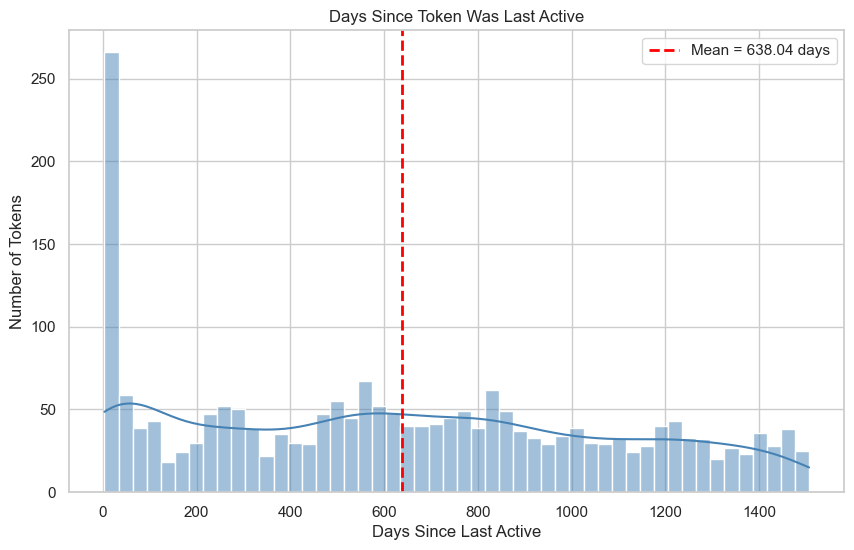

In [42]:
from datetime import datetime
df['last_active_age'] = pd.to_datetime(df['last_active_age'], errors='coerce')

# Get today's datetime
today = pd.to_datetime(datetime.today())
# Compute number of days since last activity
df['days_since_last_active'] = (today - df['last_active_age']).dt.total_seconds() / (60 * 60 * 24)
df_clean = df[df['days_since_last_active'].notnull()]
mean_days = df_clean['days_since_last_active'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['days_since_last_active'], bins=50, kde=True, color='steelblue')

# Add vertical line for the mean
plt.axvline(mean_days, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_days:.2f} days')

# Labels and legend
plt.title('Days Since Token Was Last Active')
plt.xlabel('Days Since Last Active')
plt.ylabel('Number of Tokens')
plt.legend()
plt.grid(True)
plt.show()

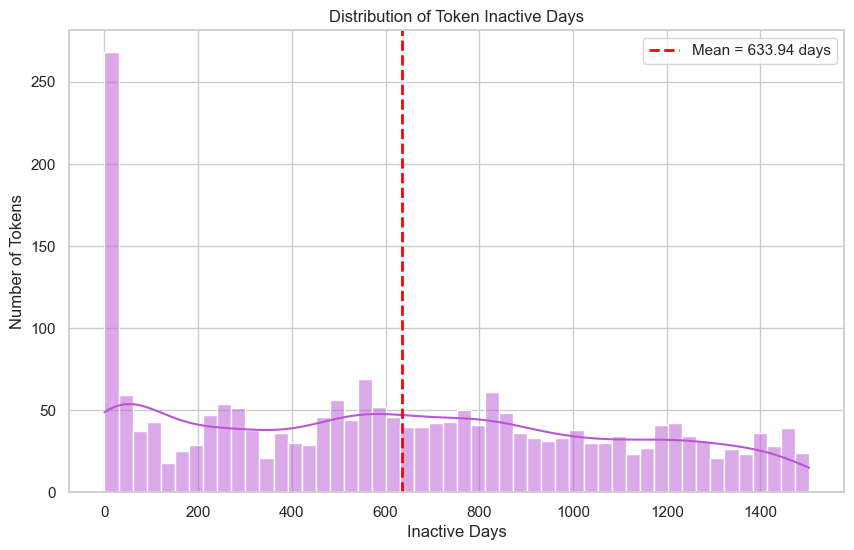

In [45]:
df_clean = df[df['inactive_days'].notnull()]

# Calculate mean
mean_inactive = df_clean['inactive_days'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['inactive_days'], bins=50, kde=True, color='mediumorchid')

# Add mean line
plt.axvline(mean_inactive, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_inactive:.2f} days')

# Labels and title
plt.title('Distribution of Token Inactive Days')
plt.xlabel('Inactive Days')
plt.ylabel('Number of Tokens')
plt.legend()
plt.grid(True)
plt.show()

### holder age was removed due to difficulties in retrieving the data